In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_anime = pd.read_csv('animes.csv')

In [3]:
data_anime

,uid,title,synopsis,genre,aired,episodes,members,popularity,ranked,score,img_url,link
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,https://cdn.myanimelist.net/images/anime/9/766...,https://myanimelist.net/anime/28891/Haikyuu_Se...
1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,https://cdn.myanimelist.net/images/anime/3/671...,https://myanimelist.net/anime/23273/Shigatsu_w...
2,34599,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,"['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...","Jul 7, 2017 to Sep 29, 2017",13.0,581663,98,23.0,8.83,https://cdn.myanimelist.net/images/anime/6/867...,https://myanimelist.net/anime/34599/Made_in_Abyss
3,5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...","['Action', 'Military', 'Adventure', 'Comedy', ...","Apr 5, 2009 to Jul 4, 2010",64.0,1615084,4,1.0,9.23,https://cdn.myanimelist.net/images/anime/1223/...,https://myanimelist.net/anime/5114/Fullmetal_A...
4,31758,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,"['Action', 'Mystery', 'Supernatural', 'Vampire']","Jan 6, 2017",1.0,214621,502,22.0,8.83,https://cdn.myanimelist.net/images/anime/3/815...,https://myanimelist.net/anime/31758/Kizumonoga...
...,...,...,...,...,...,...,...,...,...,...,...,...
19306,32979,Flip Flappers,Cocona is an average middle schooler living wi...,"['Sci-Fi', 'Adventure', 'Comedy', 'Magic']","Oct 6, 2016 to Dec 29, 2016",13.0,134252,843,1070.0,7.73,https://cdn.myanimelist.net/images/anime/4/822...,https://myanimelist.net/anime/32979/Flip_Flappers
19307,123,Fushigi Yuugi,"While visiting the National Library, junior-hi...","['Adventure', 'Fantasy', 'Magic', 'Martial Art...","Apr 6, 1995 to Mar 28, 1996",52.0,84407,1292,1071.0,7.73,https://cdn.myanimelist.net/images/anime/2/201...,https://myanimelist.net/anime/123/Fushigi_Yuugi
19308,1281,Gakkou no Kaidan,"Years ago, all of the ghosts in a haunted scho...","['Mystery', 'Horror', 'Supernatural']","Oct 22, 2000 to Mar 25, 2001",19.0,83093,1314,1073.0,7.73,https://cdn.myanimelist.net/images/anime/9/183...,https://myanimelist.net/anime/1281/Gakkou_no_K...
19309,450,InuYasha Movie 2: Kagami no Naka no Mugenjo,Inuyasha and company have finally destroyed Na...,"['Action', 'Adventure', 'Comedy', 'Historical'...","Dec 21, 2002",1.0,71989,1469,1077.0,7.73,https://cdn.myanimelist.net/images/anime/1162/...,https://myanimelist.net/anime/450/InuYasha_Mov...


In [4]:
data_anime=data_anime.head(200)

In [5]:
data_anime.set_index('title', inplace=True)

In [6]:
data_anime = data_anime[['members', 'popularity', 'ranked', 'score']]


In [7]:
data_anime.columns

Index(['members', 'popularity', 'ranked', 'score'], dtype='object')

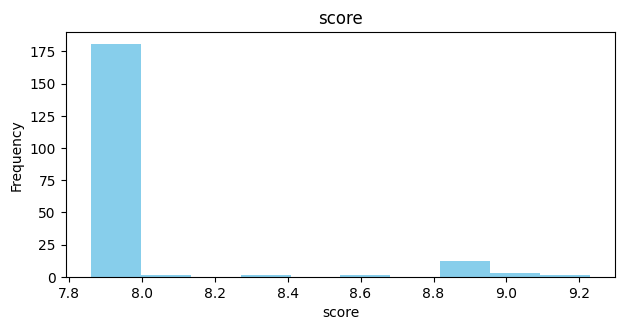

In [25]:
plt.figure(figsize=(12, 6))

# Plot for members
plt.subplot(2, 2, 1)
plt.hist(data_anime['score'], color='skyblue', bins=10)
plt.title('score')
plt.xlabel('score')
plt.ylabel('Frequency')
plt.tight_layout()


In [17]:
data_anime

,members,popularity,ranked,score
title,,,,
Haikyuu!! Second Season,489888,141,25.0,8.82
Shigatsu wa Kimi no Uso,995473,28,24.0,8.83
Made in Abyss,581663,98,23.0,8.83
Fullmetal Alchemist: Brotherhood,1615084,4,1.0,9.23
Kizumonogatari III: Reiketsu-hen,214621,502,22.0,8.83
...,...,...,...,...
Fairy Tail (2014),537817,115,617.0,7.97
There She Is!!,19234,3255,615.0,7.98
Tanaka-kun wa Itsumo Kedaruge,229884,457,613.0,7.98


# 1-Entropy

# Data Normalization


In [28]:
def normalize_data(data):
    normalized_data = data.copy()
    for column in normalized_data.columns:
            normalized_data[column] = (normalized_data[column] - normalized_data[column].min()) / (normalized_data[column].max() - normalized_data[column].min())
    return normalized_data

# Calculate entropy

In [29]:
def entropy(x):
    unique_values, value_counts = np.unique(x, return_counts=True)
    probabilities = value_counts / len(x)
    entropy_value = -np.sum(probabilities * np.log2(probabilities))
    return entropy_value

# Calculate weights based on entropy

In [30]:
def calculate_weights(dataframe):
    weights = {}
    for column in dataframe.columns:
            weights[column] = entropy(dataframe[column])
    total_entropy = sum(weights.values())
    for key in weights:
        weights[key] = 1 - (weights[key] / total_entropy)
    return weights

In [31]:
normalized_data = normalize_data(data_anime)
weights = calculate_weights(normalized_data)

In [19]:
def calculate_Weight_Total(dataframe, weights):
    Weight_Total = []
    for index, row in dataframe.iterrows():
        Weight = sum(row[c] * weights[c] for c in weights)
        Weight_Total.append(Weight)
    return Weight_Total

In [20]:
Weight_Total = calculate_Weight_Total(normalized_data, weights)

In [56]:
normalized_data['Weight_Total'] = Weight_Total

In [57]:
normalized_data

,members,popularity,ranked,score,Weight_Total
title,,,,,
Haikyuu!! Second Season,0.302393,0.017497,0.030038,0.700730,0.846070
Shigatsu wa Kimi no Uso,0.615849,0.003065,0.028786,0.708029,1.065731
Made in Abyss,0.359292,0.012005,0.027534,0.708029,0.887328
Fullmetal Alchemist: Brotherhood,1.000000,0.000000,0.000000,1.000000,1.566289
Kizumonogatari III: Reiketsu-hen,0.131731,0.063602,0.026283,0.708029,0.760289
...,...,...,...,...,...
Fairy Tail (2014),0.332108,0.014176,0.770964,0.080292,0.869108
There She Is!!,0.010593,0.415198,0.768461,0.087591,0.930509
Tanaka-kun wa Itsumo Kedaruge,0.141193,0.057854,0.765957,0.087591,0.766172


In [59]:
normalized_data[['Weight_Total']].sort_values(by='Weight_Total', ascending=False)

,Weight_Total
title,
Fullmetal Alchemist: Brotherhood,1.566289
Xiao Lu He Xiao Lan,1.349472
Yao Shen Ji 3rd Season,1.300996
Tokyo Ghoul,1.244674
Yaoguai Mingdan 2nd Season,1.221523
...,...
Durarara!! Specials,0.763098
Sekaiichi Hatsukoi,0.762323
Kizumonogatari III: Reiketsu-hen,0.760289


In [61]:
def calculate(data, weights):
    # Création d'une fonction pour calculer le WPM pour une ligne donnée
    def calculate_row_wpm(row):
        return np.prod([row[c] ** weights[c] for c in weights])
    
    # Application de la fonction sur chaque ligne du DataFrame
    values = data.apply(calculate_row_wpm, axis=1)
    
    return values

In [62]:
wpm_values = calculate(normalized_data, weights)

In [63]:
normalized_data['WPM'] = wpm_values

In [64]:
normalized_data

,members,popularity,ranked,score,Weight_Total,WPM
title,,,,,,
Haikyuu!! Second Season,0.302393,0.017497,0.030038,0.700730,0.846070,0.001398
Shigatsu wa Kimi no Uso,0.615849,0.003065,0.028786,0.708029,1.065731,0.000654
Made in Abyss,0.359292,0.012005,0.027534,0.708029,0.887328,0.001145
Fullmetal Alchemist: Brotherhood,1.000000,0.000000,0.000000,1.000000,1.566289,0.000000
Kizumonogatari III: Reiketsu-hen,0.131731,0.063602,0.026283,0.708029,0.760289,0.001782
...,...,...,...,...,...,...
Fairy Tail (2014),0.332108,0.014176,0.770964,0.080292,0.869108,0.002091
There She Is!!,0.010593,0.415198,0.768461,0.087591,0.930509,0.002139
Tanaka-kun wa Itsumo Kedaruge,0.141193,0.057854,0.765957,0.087591,0.766172,0.003327


In [65]:
normalized_data[['WPM']].sort_values(by='WPM', ascending=False)

,WPM
title,
Kaguya-hime no Monogatari,0.005207
Koukaku Kidoutai 2.0,0.004398
Sakigake!! Cromartie Koukou,0.003396
Tanaka-kun wa Itsumo Kedaruge,0.003327
Tennis no Ouji-sama,0.003286
...,...
Haikyuu!! Movie 2: Shousha to Haisha,0.000000
Gochuumon wa Usagi Desu ka??: Dear My Sister,0.000000
"Doukyonin wa Hiza, Tokidoki, Atama no Ue.",0.000000


In [165]:
WT=normalized_data[['Weight_Total']].sort_values(by='Weight_Total', ascending=False).head(20)
WPM=normalized_data[['WPM']].sort_values(by='WPM', ascending=False).head(20)

In [170]:
WT

,Weight_Total
title,
Fullmetal Alchemist: Brotherhood,1.566289
Xiao Lu He Xiao Lan,1.349472
Yao Shen Ji 3rd Season,1.300996
Tokyo Ghoul,1.244674
Yaoguai Mingdan 2nd Season,1.221523
...,...
Durarara!! Specials,0.763098
Sekaiichi Hatsukoi,0.762323
Kizumonogatari III: Reiketsu-hen,0.760289


In [171]:
WPM

,WPM
title,
Kaguya-hime no Monogatari,0.005207
Koukaku Kidoutai 2.0,0.004398
Sakigake!! Cromartie Koukou,0.003396
Tanaka-kun wa Itsumo Kedaruge,0.003327
Tennis no Ouji-sama,0.003286
...,...
Haikyuu!! Movie 2: Shousha to Haisha,0.000000
Gochuumon wa Usagi Desu ka??: Dear My Sister,0.000000
"Doukyonin wa Hiza, Tokidoki, Atama no Ue.",0.000000


# 2-AHP

In [77]:
file_path = 'Matrix.txt'

In [ ]:
matrix_elements = (n**2 - n) / 2
comparison_matrix = np.eye(n)


In [ ]:
comparison_matrix.shape[0]

In [ ]:
# Update c_matrix using df values
df_values = df.values
np.fill_diagonal(df_values, np.diagonal(comparison_matrix))
comparison_matrix[:, :] = df_values

In [ ]:
for i in range(n):
   for j in range(n):
       if i < j:
          c_matrix[i, j] = 1 / c_matrix[j,i]
       else :
          c_matrix[i, j] = c_matrix[i,j] 

In [78]:
def read_data(filename):
  with open(filename, 'r') as f:
    data = []
    for line in f:
      data.append([float(x) for x in line.strip().split()])
  return np.array(data)

In [172]:
def c_matrix(donnees):

  n = len(donnees)
  comparaison_matrice = np.eye(n)
  for i in range(n):
    for j in range(n):
      if i == j:
        comparaison_matrice[i, j] = 1
      elif i < j:
        comparaison_matrice[i, j] = 1 / donnees[j,i]
      else :
        comparaison_matrice[i, j]=donnees[i,j]


  return comparaison_matrice

In [89]:
matrix = read_data(file_path)
confusion_matrix = c_matrix(matrix)

In [91]:
confusion_matrix

array([[1.        , 0.33333333, 0.2       , 0.14285714],
       [3.        , 1.        , 0.33333333, 0.2       ],
       [5.        , 3.        , 1.        , 0.33333333],
       [7.        , 5.        , 3.        , 1.        ]])

In [92]:
def Normalization_matrix(matrix):
    min = np.min(matrix)
    max = np.max(matrix)
    if min == max:
        matrice_normalisée = np.full_like(matrix, 0.5)
    else:
        matrice_normalisée = (matrix - min) / (max - min)

    return matrice_normalisée

In [93]:
normalized_matrices = Normalization_matrix(confusion_matrix)

In [94]:
normalized_matrices

array([[0.125     , 0.02777778, 0.00833333, 0.        ],
       [0.41666667, 0.125     , 0.02777778, 0.00833333],
       [0.70833333, 0.41666667, 0.125     , 0.02777778],
       [1.        , 0.70833333, 0.41666667, 0.125     ]])

In [95]:
def calculate_weights(M):
    num_columns = len(M[0])
    weight = []
    for row in M:
        row_mean = sum(row) / num_columns
        weight.append(row_mean)
    return np.array(weight)

In [96]:
Total_weights = calculate_weights(normalized_matrices)

In [97]:
Total_weights

array([0.04027778, 0.14444444, 0.31944444, 0.5625    ])

In [98]:
def factor(M,N):
  for i in range(M.shape[0]):
    for j in range(N.shape[0]):
      M[i, j] = M[i, j] * N[j]
  return M

In [99]:
AW = factor(np.array(confusion_matrix),Total_weights)
AW=np.sum(AW, axis=1)

In [100]:
AW

array([0.23267196, 0.48425926, 1.14166667, 2.525     ])

In [104]:
data_anime_normalized = pd.DataFrame(normalized_matrices, index=['members','popularity','ranked','score'],columns=['members','popularity','ranked','score'])

In [105]:
data_anime_normalized

,members,popularity,ranked,score
members,0.125000,0.027778,0.008333,0.000000
popularity,0.416667,0.125000,0.027778,0.008333
ranked,0.708333,0.416667,0.125000,0.027778
score,1.000000,0.708333,0.416667,0.125000


In [116]:
def lambda_and_ci(weights, average_weights):
    lambda_list = [j / i for i, j in zip(weights, average_weights)]
    # Calculate the consistency index (CI)
    mean_lambda = sum(lambda_list) / len(lambda_list)
    CI = (mean_lambda - len(lambda_list)) / (len(lambda_list) - 1)
    
    return CI


In [117]:
def CR(weights_data, average_weights_data):
    RI_value = 0.90  # We choose 0.90 because we have 4 criteria
    CI_value = lambda_and_ci(weights_data, average_weights_data)
    
    # Calculate the consistency ratio (CR)
    CR_value = CI_value / RI_value
    return CR_value


In [118]:
CR_value = CR(Total_weights,AW)
print(CR_value)

0.11037491869992304


# WSM


In [119]:
data_anime.columns

Index(['members', 'popularity', 'ranked', 'score'], dtype='object')

In [120]:
data_anime.shape

(200, 4)

## Normalize Decision matrix


In [148]:
def normalize_data(data):
    return data / data.sum()


In [149]:
normalized_data_anime = data_anime.apply(normalize_data)

In [126]:
weighted_dataframe = normalized_data_anime * Total_weights

In [127]:
ranked_anime_series = weighted_dataframe.sum(axis=1)

In [128]:
ranked_anime_series = ranked_anime_series.sort_values(ascending=False)

In [131]:
ranked_anime_df = pd.DataFrame({'Anime': ranked_anime_series.index, 'Rank': ranked_anime_series.values})

print(ranked_anime_df)

                                                 Anime      Rank
0                                  Xiao Lu He Xiao Lan  0.007424
1                               Yao Shen Ji 3rd Season  0.007243
2                           Yaoguai Mingdan 2nd Season  0.006899
3                               Douluo Dalu 2nd Season  0.006715
4                    Manga de Wakaru! Fate/Grand Order  0.006585
..                                                 ...       ...
195  Gintama Movie 2: Kanketsu-hen - Yorozuya yo Ei...  0.003663
196                                           Gintama.  0.003654
197                                Gintama': Enchousen  0.003638
198                         Owarimonogatari 2nd Season  0.003628
199                   Kizumonogatari III: Reiketsu-hen  0.003604

[200 rows x 2 columns]


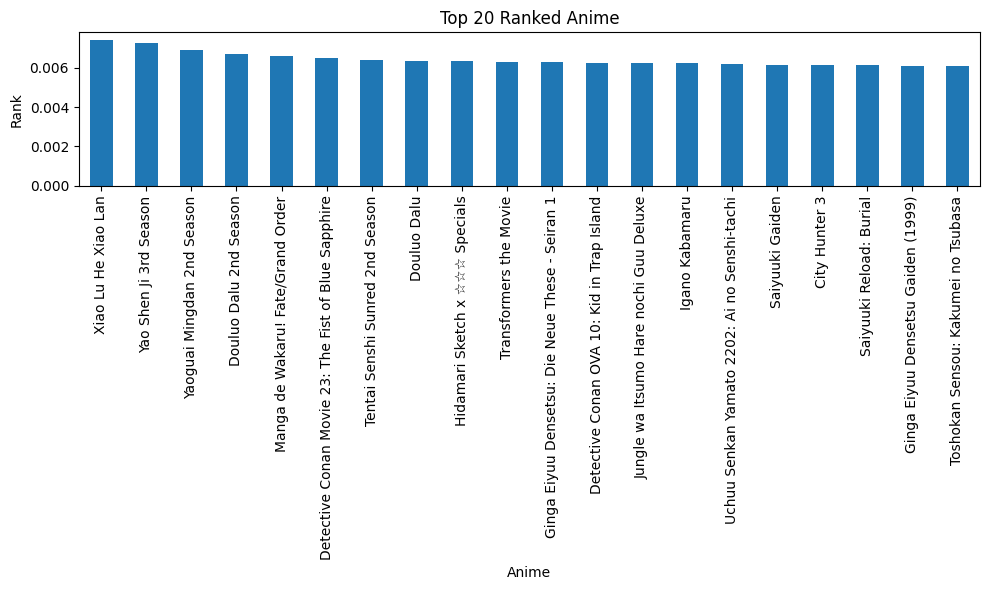

In [134]:
top_20_anime = ranked_anime_series.head(20)

plt.figure(figsize=(10, 6))
top_20_anime.plot(kind='bar')
plt.xlabel('Anime')
plt.ylabel('Rank')
plt.title('Top 20 Ranked Anime')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# WPM

In [150]:

weighted_dataframe_wpm = normalized_data_anime.pow(Total_weights)

In [151]:
weighted_product_matrix = weighted_dataframe_wpm.prod(axis=1)

In [152]:
ranked_anime1 = weighted_product_matrix.sort_values(ascending=False)


In [153]:
ranked_anime_df1 = pd.DataFrame({'Anime': ranked_anime1.index, 'Rank': ranked_anime1.values})

print(ranked_anime_df1)

                                               Anime      Rank
0                         Yaoguai Mingdan 2nd Season  0.003770
1                             Yao Shen Ji 3rd Season  0.003744
2                  Manga de Wakaru! Fate/Grand Order  0.003735
3                     Hidamari Sketch x ☆☆☆ Specials  0.003729
4    Ginga Eiyuu Densetsu: Die Neue These - Seiran 1  0.003723
..                                               ...       ...
195                                    One Punch Man  0.000754
196                                          Gintama  0.000738
197                             Clannad: After Story  0.000684
198               Code Geass: Hangyaku no Lelouch R2  0.000681
199                 Fullmetal Alchemist: Brotherhood  0.000217

[200 rows x 2 columns]


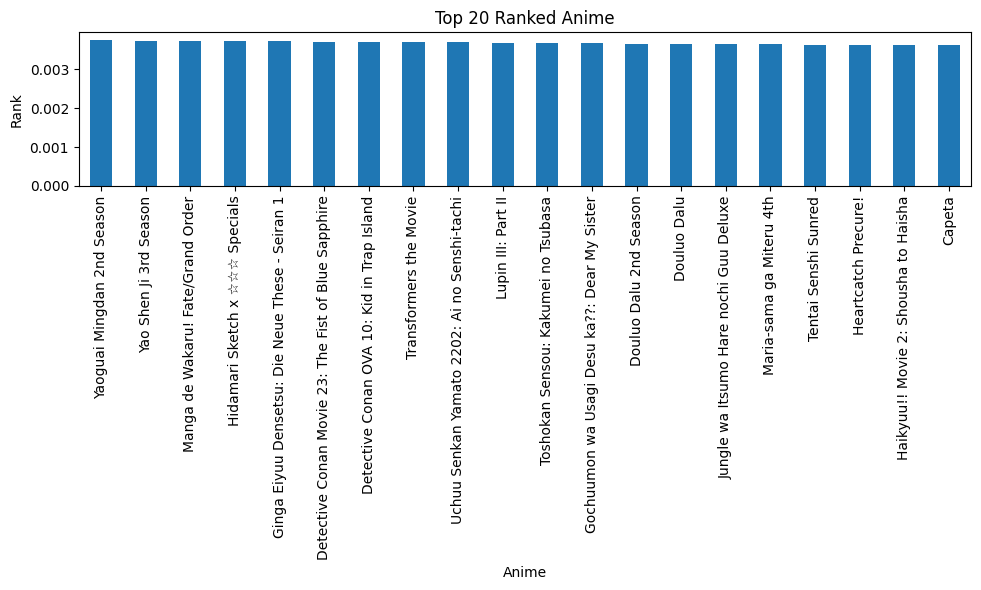

In [156]:
top_20_anime1 = ranked_anime1.head(20)

plt.figure(figsize=(10, 6))
top_20_anime1.plot(kind='bar')
plt.xlabel('Anime')
plt.ylabel('Rank')
plt.title('Top 20 Ranked Anime')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

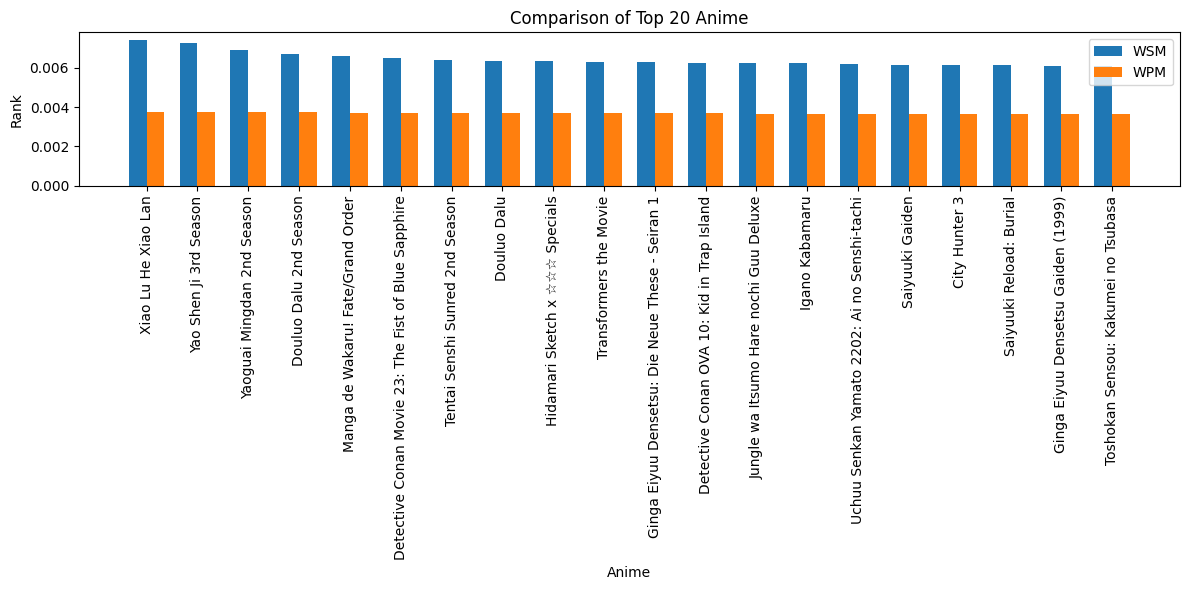

In [160]:
plt.figure(figsize=(12, 6))

bar_width = 0.35
index = np.arange(len(top_20_anime))

plt.bar(index, top_20_anime, bar_width, label='WSM')
plt.bar(index + bar_width, top_20_anime1, bar_width, label='WPM')

plt.xlabel('Anime')
plt.ylabel('Rank')
plt.title('Comparison of Top 20 Anime')
plt.xticks(index + bar_width / 2, top_20_anime.index, rotation=90)
plt.tight_layout()
plt.legend()

plt.show()

# Promethee

In [18]:
data_anime

,members,popularity,ranked,score
title,,,,
Haikyuu!! Second Season,489888,141,25.0,8.82
Shigatsu wa Kimi no Uso,995473,28,24.0,8.83
Made in Abyss,581663,98,23.0,8.83
Fullmetal Alchemist: Brotherhood,1615084,4,1.0,9.23
Kizumonogatari III: Reiketsu-hen,214621,502,22.0,8.83
...,...,...,...,...
Fairy Tail (2014),537817,115,617.0,7.97
There She Is!!,19234,3255,615.0,7.98
Tanaka-kun wa Itsumo Kedaruge,229884,457,613.0,7.98


# Step 1

In [19]:
def R_ij(X):
    min_val = X.min()
    max_val = X.max()
    return (X - min_val) / (max_val - min_val)

In [15]:
r_ij_matrix = data_anime.apply(R_ij)

In [20]:
r_ij_matrix=r_ij_matrix.values

# Step 2

In [21]:
n = r_ij_matrix.shape[0]  # Number of alternatives
m = r_ij_matrix.shape[1]  # Number of criteria
D_matrix = np.zeros((n, n, m))

for k in range(m):  # Itérer sur les critères
    for i in range(n):  # Itérer sur chaque alternative
        for j in range(i+1, n):  # Itérer sur chaque paire d'alternatives distinctes
            D_matrix[i, j, k] = r_ij_matrix[i, k] - r_ij_matrix[j, k]  # Calculer la différence de préférence
            D_matrix[j, i, k] = -D_matrix[i, j, k]  # La différence pour l'alternative j par rapport à i est l'opposé de celle pour i par rapport à j

for k in range(m):
    print(f"Critère {k+1}:")
    print(D_matrix[:, :, k])

Critère 1:
[[ 0.         -0.31345633 -0.05689934 ...  0.1611992   0.29980793
   0.24223342]
 [ 0.31345633  0.          0.25655699 ...  0.47465553  0.61326426
   0.55568975]
 [ 0.05689934 -0.25655699  0.         ...  0.21809855  0.35670727
   0.29913276]
 ...
 [-0.1611992  -0.47465553 -0.21809855 ...  0.          0.13860872
   0.08103421]
 [-0.29980793 -0.61326426 -0.35670727 ... -0.13860872  0.
  -0.05757451]
 [-0.24223342 -0.55568975 -0.29913276 ... -0.08103421  0.05757451
   0.        ]]
Critère 2:
[[ 0.          0.01443167  0.0054917  ... -0.0403576  -0.650447
  -0.12247765]
 [-0.01443167  0.         -0.00893997 ... -0.05478927 -0.66487867
  -0.13690932]
 [-0.0054917   0.00893997  0.         ... -0.0458493  -0.6559387
  -0.12796935]
 ...
 [ 0.0403576   0.05478927  0.0458493  ...  0.         -0.6100894
  -0.08212005]
 [ 0.650447    0.66487867  0.6559387  ...  0.6100894   0.
   0.52796935]
 [ 0.12247765  0.13690932  0.12796935 ...  0.08212005 -0.52796935
   0.        ]]
Critère 3:
[[ 

In [22]:
D_matrix.shape

(200, 200, 4)

In [11]:
P_matrix = pd.DataFrame(index=data_anime.index, columns=data_anime.index)

In [17]:
weights_array = np.array(list(weights.values()))

weight_ij_matrix = r_ij_matrix * weights_array

In [18]:
weight_ij_matrix.shape

(200, 4)

# Step 3

In [19]:
Pj_matrix = np.zeros((n, n, len(data_anime.columns)))  # Initialize Pj matrix

for k in range(len(data_anime.columns)):
    for i in range(n):
        for j in range(n):
            if D_matrix[i, j, k] <= 0:
                Pj_matrix[i, j, k] = 0
            else:
                Pj_matrix[i, j, k] = D_matrix[i, j, k]

print("Pj Matrix:")
print(Pj_matrix)

Pj Matrix:
[[[0.         0.         0.         0.        ]
  [0.         0.01443167 0.00125156 0.        ]
  [0.         0.0054917  0.00250313 0.        ]
  ...
  [0.1611992  0.         0.         0.61313869]
  [0.29980793 0.         0.         0.61313869]
  [0.24223342 0.         0.         0.61313869]]

 [[0.31345633 0.         0.         0.00729927]
  [0.         0.         0.         0.        ]
  [0.25655699 0.         0.00125156 0.        ]
  ...
  [0.47465553 0.         0.         0.62043796]
  [0.61326426 0.         0.         0.62043796]
  [0.55568975 0.         0.         0.62043796]]

 [[0.05689934 0.         0.         0.00729927]
  [0.         0.00893997 0.         0.        ]
  [0.         0.         0.         0.        ]
  ...
  [0.21809855 0.         0.         0.62043796]
  [0.35670727 0.         0.         0.62043796]
  [0.29913276 0.         0.         0.62043796]]

 ...

 [[0.         0.0403576  0.7359199  0.        ]
  [0.         0.05478927 0.73717146 0.        ]

In [24]:
n = D_matrix.shape[0]  # Nombre d'alternatives
m = D_matrix.shape[2]  # Nombre de critères
P_matrix = np.zeros((n, n, m))

for k in range(m):  # Itérer sur chaque critère
    for i in range(n):  # Itérer sur chaque alternative Ma
        for j in range(n):  # Itérer sur chaque alternative DMb
            if D_matrix[i, j, k] <= 0:
                P_matrix[i, j, k] = 0
            else:
                P_matrix[i, j, k] = D_matrix[i, j, k]

In [25]:
print("Matrice Pj(a, b)")
for k in range(m):
    print(f"Critère {k+1}:")
    print(P_matrix[:, :, k])

Matrice Pj(a, b)
Critère 1:
[[0.         0.         0.         ... 0.1611992  0.29980793 0.24223342]
 [0.31345633 0.         0.25655699 ... 0.47465553 0.61326426 0.55568975]
 [0.05689934 0.         0.         ... 0.21809855 0.35670727 0.29913276]
 ...
 [0.         0.         0.         ... 0.         0.13860872 0.08103421]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.05757451 0.        ]]
Critère 2:
[[0.         0.01443167 0.0054917  ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00893997 0.         ... 0.         0.         0.        ]
 ...
 [0.0403576  0.05478927 0.0458493  ... 0.         0.         0.        ]
 [0.650447   0.66487867 0.6559387  ... 0.6100894  0.         0.52796935]
 [0.12247765 0.13690932 0.12796935 ... 0.08212005 0.         0.        ]]
Critère 3:
[[0.         0.00125156 0.00250313 ... 0.         0.         0

In [27]:
P_matrix.shape

(200, 200, 4)

# Step 4

In [32]:
weights_array = np.array(list(weights.values()))

In [34]:
r_ij_matrix = r_ij_matrix * weights_array

In [35]:
n = P_matrix.shape[0]  # Nombre d'alternatives
m = P_matrix.shape[2]  # Nombre de critères
Pi_matrix = np.zeros((n, n, m))

for k in range(m):  # Itérer sur chaque critère
    for i in range(n):  # Itérer sur chaque alternative Ma
        for j in range(n):  # Itérer sur chaque alternative DMb
            if not np.isnan(P_matrix[i, j, k]):
                numerator = r_ij_matrix[i, k] * P_matrix[i, j, k]  # Somme pondérée des éléments de Pj(a, b)
                denominator = r_ij_matrix[i, k]  # Somme des poids
                if denominator != 0:
                    Pi_matrix[i, j, k] = numerator / denominator  # Calcul de l'élément de la matrice Pi(a, b)
                else:
                    Pi_matrix[i, j, k] = np.nan  # Définir la valeur comme NaN si la somme des poids est nulle
            else:
                Pi_matrix[i, j, k] = np.nan  # Définir la valeur comme NaN si la valeur de P_matrix est NaN


In [37]:
Pi_matrix

array([[[0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.01443167, 0.00125156, 0.        ],
        [0.        , 0.0054917 , 0.00250313, 0.        ],
        ...,
        [0.1611992 , 0.        , 0.        , 0.61313869],
        [0.29980793, 0.        , 0.        , 0.61313869],
        [0.24223342, 0.        , 0.        , 0.61313869]],

       [[0.31345633, 0.        , 0.        , 0.00729927],
        [0.        , 0.        , 0.        , 0.        ],
        [0.25655699, 0.        , 0.00125156, 0.        ],
        ...,
        [0.47465553, 0.        , 0.        , 0.62043796],
        [0.61326426, 0.        , 0.        , 0.62043796],
        [0.55568975, 0.        , 0.        , 0.62043796]],

       [[0.05689934, 0.        , 0.        , 0.00729927],
        [0.        , 0.00893997, 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        ...,
        [0.21809855, 0.        , 0.        , 0.62043796],
        [0.35670727, 0.      

In [40]:
Pi_matrix.shape

(200, 200, 4)

In [41]:
sum_matrix_per_row = np.sum(Pi_matrix, axis=2, keepdims=True)  # Somme le long de l'axe des colonnes pour chaque ligne et garde la dimension

In [42]:
sum_matrix_per_row_reshaped = sum_matrix_per_row.reshape(-1, 1)

print("Matrice de sommes des lignes (une colonne par ligne")
print(sum_matrix_per_row_reshaped)

Matrice de sommes des lignes (une colonne par ligne
[[0.        ]
 [0.01568324]
 [0.00799483]
 ...
 [0.08212005]
 [0.05757451]
 [0.        ]]


In [43]:
sum_matrix_per_row_reshaped.shape

(40000, 1)

In [44]:
relation_table = np.zeros((n, n))

In [45]:
for i in range(n):
    for j in range(n):
        if i != j:
            relation_table[i, j] = sum_matrix_per_row_reshaped[i, 0]  # Affecter la valeur de la somme
        else:
            relation_table[i, j] = np.nan  # Laisser la relation entre la même alternative comme NaN


In [46]:
print("Table de relation entre les alternatives")
print(relation_table)

Table de relation entre les alternatives
[[       nan 0.         0.         ... 0.         0.         0.        ]
 [0.01568324        nan 0.01568324 ... 0.01568324 0.01568324 0.01568324]
 [0.00799483 0.00799483        nan ... 0.00799483 0.00799483 0.00799483]
 ...
 [0.77433789 0.77433789 0.77433789 ...        nan 0.77433789 0.77433789]
 [0.91294661 0.91294661 0.91294661 ... 0.91294661        nan 0.91294661]
 [0.8553721  0.8553721  0.8553721  ... 0.8553721  0.8553721         nan]]


In [49]:
len(relation_table)

200

In [67]:
relation_df = pd.DataFrame(np.nan, index=data_anime.index, columns=data_anime.index)  # Initialisation du DataFrame avec des NaN

k = 0
for i in range(200):
    for j in range(200):
        if i != j:
            relation_df.iloc[i, j] = sum_matrix_per_row_reshaped[k][0]
            k += 1

In [68]:
relation_df

title,Haikyuu!! Second Season,Shigatsu wa Kimi no Uso,Made in Abyss,Fullmetal Alchemist: Brotherhood,Kizumonogatari III: Reiketsu-hen,Mob Psycho 100 II,Sen to Chihiro no Kamikakushi,Kimetsu no Yaiba,Owarimonogatari 2nd Season,Code Geass: Hangyaku no Lelouch R2,...,Igano Kabamaru,IDOLiSH7,Hokuto no Ken,High☆Speed!: Free! Starting Days,Hidamari Sketch x Honeycomb,Fairy Tail (2014),There She Is!!,Tanaka-kun wa Itsumo Kedaruge,Tentai Senshi Sunred 2nd Season,Sakigake!! Cromartie Koukou
title,,,,,,,,,,,,,,,,,,,,,
Haikyuu!! Second Season,NaN,0.000000,0.015683,0.007995,0.047534,0.174417,0.034504,0.019157,0.011979,0.194722,...,0.901679,0.919356,0.909071,0.874689,0.892790,0.913270,0.623759,0.904938,0.774338,0.912947
Shigatsu wa Kimi no Uso,0.855372,NaN,0.320756,0.000000,0.257809,0.031851,0.486622,0.346709,0.056007,0.266923,...,1.225060,1.222435,1.240112,1.229826,1.195445,1.213545,1.234025,0.911478,1.225694,1.095093
Made in Abyss,1.233702,1.176128,NaN,0.064199,0.008940,0.000000,0.039540,0.228813,0.088900,0.011162,...,0.956190,0.968503,0.965878,0.983555,0.973269,0.938888,0.956988,0.977468,0.654921,0.969137
Fullmetal Alchemist: Brotherhood,0.838537,0.977145,0.919571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Kizumonogatari III: Reiketsu-hen,NaN,NaN,NaN,NaN,NaN,0.053404,0.060536,0.051596,0.089884,0.000000,...,0.684664,0.671878,0.728629,0.740942,0.738316,0.755993,0.745708,0.711326,0.729427,0.749907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Fairy Tail (2014),1.159700,1.178321,1.171143,1.112752,1.183736,1.159955,1.087516,1.084553,1.179802,1.185268,...,0.421558,0.023039,0.382886,0.011982,0.302018,NaN,0.770642,0.753289,0.745600,0.785140
There She Is!!,0.945058,0.805146,0.756763,0.749585,0.965364,0.762177,0.840502,1.000512,1.004291,0.758244,...,0.322547,0.000000,0.324018,0.195921,0.333278,0.278207,NaN,1.136124,1.151807,1.144119
Tanaka-kun wa Itsumo Kedaruge,1.183659,1.093774,1.136660,1.155281,1.148104,1.089713,1.160696,1.136916,1.064476,1.061513,...,0.182140,0.008332,0.408321,0.000000,0.359847,0.009260,0.278978,NaN,0.776277,0.791961


# Step 5

In [70]:
phi_plus = (1 / (200 - 1)) * np.sum(relation_df, axis=1)
phi_minus = (1 / (200 - 1)) * np.sum(relation_df, axis=0)

relation_df['Phi+'] = phi_plus
relation_df['Phi-'] = phi_minus

print(relation_df)

title                             Haikyuu!! Second Season  \
title                                                       
Haikyuu!! Second Season                               NaN   
Shigatsu wa Kimi no Uso                          0.855372   
Made in Abyss                                    1.233702   
Fullmetal Alchemist: Brotherhood                 0.838537   
Kizumonogatari III: Reiketsu-hen                      NaN   
...                                                   ...   
Fairy Tail (2014)                                1.159700   
There She Is!!                                   0.945058   
Tanaka-kun wa Itsumo Kedaruge                    1.183659   
Tentai Senshi Sunred 2nd Season                  0.784272   
Sakigake!! Cromartie Koukou                      1.403302   

title                             Shigatsu wa Kimi no Uso  Made in Abyss  \
title                                                                      
Haikyuu!! Second Season                          0.000

In [77]:
relation_df['Phi+']

title
Haikyuu!! Second Season             0.828964
Shigatsu wa Kimi no Uso             1.127548
Made in Abyss                       0.889703
Fullmetal Alchemist: Brotherhood    0.013745
Kizumonogatari III: Reiketsu-hen    0.682778
                                      ...   
Fairy Tail (2014)                   0.312516
There She Is!!                      0.358657
Tanaka-kun wa Itsumo Kedaruge       0.307424
Tentai Senshi Sunred 2nd Season     0.201993
Sakigake!! Cromartie Koukou         0.543175
Name: Phi+, Length: 200, dtype: float64

# Step 6

In [87]:
def compare_alternatives(phi_plus_a, phi_minus_a, phi_plus_b, phi_minus_b):
    if (phi_plus_a > phi_plus_b and phi_minus_a < phi_minus_b) or (phi_plus_a > phi_plus_b and phi_minus_a == phi_minus_b) or (phi_plus_a == phi_plus_b and phi_minus_a < phi_minus_b):
        return 'aPb'  # a est préférée à b
    elif phi_plus_a == phi_plus_b and phi_minus_a == phi_minus_b:
        return 'aIb'  # Indifférence entre a et b
    elif (phi_plus_a > phi_plus_b and phi_minus_a > phi_minus_b) or (phi_plus_a < phi_plus_b and phi_minus_a < phi_minus_b) :
        return 'aRb'  # Incomparable: a n'est ni préférée à b ni b à a
    else:
        return None  # Si aucune des conditions ci-dessus n'est satisfaite

In [88]:
phi_plus_values = relation_df['Phi+'].values
phi_minus_values = relation_df['Phi-'].values

In [90]:
ranking_table = pd.DataFrame('', index=data_anime.index, columns=data_anime.index)

In [92]:
for i, a in enumerate(data_anime.index):
    for j, b in enumerate(data_anime.index):
        if i != j:  # Assurez-vous que vous ne comparez pas une alternative avec elle-même
            relation = compare_alternatives(phi_plus_values[i], phi_minus_values[i], phi_plus_values[j], phi_minus_values[j])
            ranking_table.loc[a, b] = relation


In [93]:
print("Classement des alternatives")
print(ranking_table)

Classement des alternatives
title                            Haikyuu!! Second Season  \
title                                                      
Haikyuu!! Second Season                                    
Shigatsu wa Kimi no Uso                              aPb   
Made in Abyss                                        aPb   
Fullmetal Alchemist: Brotherhood                     aRb   
Kizumonogatari III: Reiketsu-hen                     aRb   
...                                                  ...   
Fairy Tail (2014)                                    aRb   
There She Is!!                                      None   
Tanaka-kun wa Itsumo Kedaruge                       None   
Tentai Senshi Sunred 2nd Season                     None   
Sakigake!! Cromartie Koukou                         None   

title                            Shigatsu wa Kimi no Uso Made in Abyss  \
title                                                                    
Haikyuu!! Second Season                    

In [97]:
ranking_table

title,Haikyuu!! Second Season,Shigatsu wa Kimi no Uso,Made in Abyss,Fullmetal Alchemist: Brotherhood,Kizumonogatari III: Reiketsu-hen,Mob Psycho 100 II,Sen to Chihiro no Kamikakushi,Kimetsu no Yaiba,Owarimonogatari 2nd Season,Code Geass: Hangyaku no Lelouch R2,...,Igano Kabamaru,IDOLiSH7,Hokuto no Ken,High☆Speed!: Free! Starting Days,Hidamari Sketch x Honeycomb,Fairy Tail (2014),There She Is!!,Tanaka-kun wa Itsumo Kedaruge,Tentai Senshi Sunred 2nd Season,Sakigake!! Cromartie Koukou
title,,,,,,,,,,,,,,,,,,,,,
Haikyuu!! Second Season,,None,None,aRb,aRb,None,None,None,aRb,None,...,aRb,aRb,aPb,aRb,aPb,aRb,aPb,aPb,aPb,aPb
Shigatsu wa Kimi no Uso,aPb,,aRb,aRb,aRb,aRb,aRb,aRb,aRb,None,...,aPb,aPb,aPb,aPb,aPb,aPb,aPb,aPb,aPb,aPb
Made in Abyss,aPb,aRb,,aPb,aPb,aRb,None,None,aRb,None,...,aPb,aPb,aPb,aPb,aPb,aPb,aPb,aPb,aPb,aPb
Fullmetal Alchemist: Brotherhood,aRb,aRb,None,,aRb,None,None,None,None,None,...,aRb,aRb,aRb,aRb,aRb,aRb,aRb,aRb,aRb,aRb
Kizumonogatari III: Reiketsu-hen,aRb,aRb,None,aRb,,None,None,None,None,None,...,aPb,aPb,aPb,aPb,aPb,aPb,aPb,aPb,aPb,aPb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Fairy Tail (2014),aRb,None,None,aRb,None,None,None,None,None,None,...,aRb,None,aPb,aRb,aPb,,aRb,aPb,aPb,aRb
There She Is!!,None,None,None,aRb,None,None,None,None,None,None,...,aRb,None,aRb,aRb,aPb,aRb,,aPb,aRb,aRb
Tanaka-kun wa Itsumo Kedaruge,None,None,None,aRb,None,None,None,None,None,None,...,aRb,None,aRb,aRb,aPb,None,None,,aRb,aRb


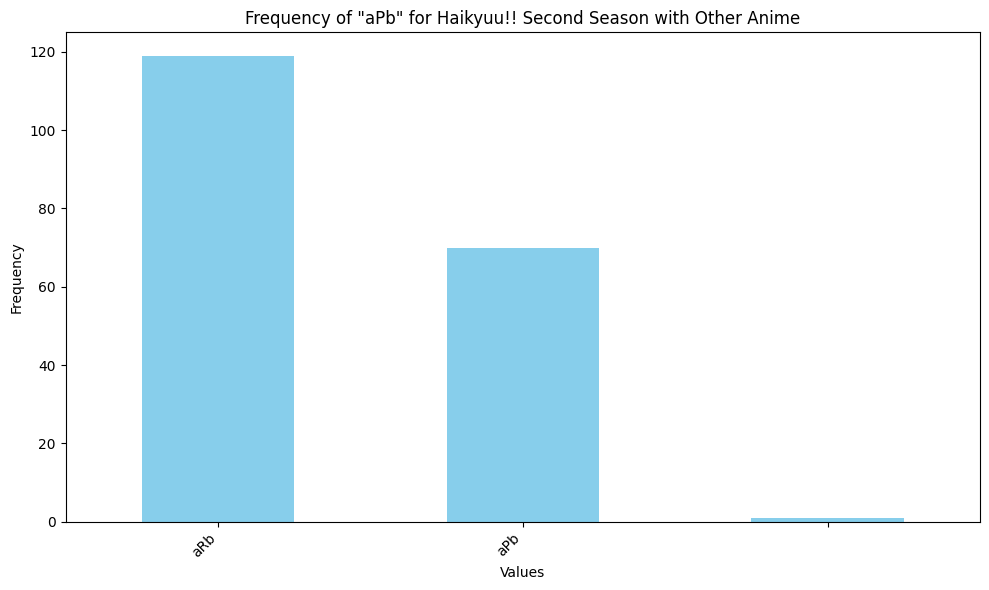

In [100]:
anime_row = 'Haikyuu!! Second Season'
aPb_counts = ranking_table.loc[anime_row].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
aPb_counts.plot(kind='bar', color='skyblue')
plt.title(f'Frequency of "aPb" for {anime_row} with Other Anime')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [101]:
aPb_counts = {}

# Iterate over each row in the DataFrame
for anime in ranking_table.index:
    # Count occurrences of 'aPb' for the current anime
    count = (ranking_table.loc[anime] == 'aPb').sum()
    # Store the count in the dictionary
    aPb_counts[anime] = count

# Convert the dictionary to a DataFrame
aPb_counts_df = pd.DataFrame.from_dict(aPb_counts, orient='index', columns=['aPb_Count'])

# Sort the DataFrame by the count of 'aPb' in descending order
top_20_anime = aPb_counts_df.sort_values(by='aPb_Count', ascending=False).head(20)

# Display the top 20 anime titles with the most frequent 'aPb' occurrences
print(top_20_anime)

                                                    aPb_Count
One Punch Man                                             197
Clannad: After Story                                      190
Gintama                                                   188
Gintama': Enchousen                                       184
Code Geass: Hangyaku no Lelouch R2                        184
Gintama.                                                  179
Gintama Movie 2: Kanketsu-hen - Yorozuya yo Eie...        179
Haikyuu!!: Karasuno Koukou vs. Shiratorizawa Ga...        177
Owarimonogatari 2nd Season                                175
Kaguya-hime no Monogatari                                 166
Sen to Chihiro no Kamikakushi                             162
Kimetsu no Yaiba                                          162
Made in Abyss                                             155
Yaoguai Mingdan 2nd Season                                155
Mob Psycho 100 II                                         155
Eikoku K

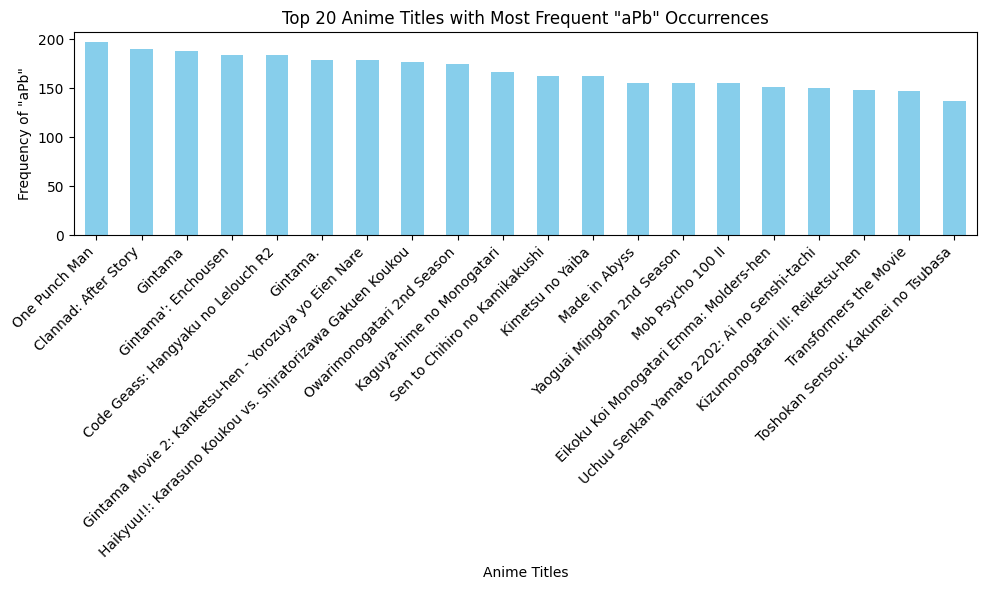

In [102]:
plt.figure(figsize=(10, 6))
top_20_anime['aPb_Count'].plot(kind='bar', color='skyblue')
plt.title('Top 20 Anime Titles with Most Frequent "aPb" Occurrences')
plt.xlabel('Anime Titles')
plt.ylabel('Frequency of "aPb"')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()